# GDP and Life Expectancy(2018)
Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?

The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2018 and the life expectancy of people born in that country in 2018.

# Getting the data
Two datasets of the World Bank are considered. One dataset, available at http://data.worldbank.org/indicator/NY.GDP.MKTP.CD, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at http://data.worldbank.org/indicator/SP.DYN.LE00.IN, lists the life expectancy of the world's countries. The datasets were downloaded as CSV files in March 2016.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2018
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_csv('WB GDP 2018.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_csv('WB LE 2018.csv')
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Afghanistan,2018,64.486
1,Albania,2018,78.458
2,Algeria,2018,76.693
3,American Samoa,2018,NaN
4,Andorra,2018,NaN


In [2]:
gdpReset.tail(50)

,country,year,NY.GDP.MKTP.CD
214,"Yemen, Rep.",2018,2.348627e+10
215,Zambia,2018,2.631214e+10
216,Zimbabwe,2018,2.431156e+10
217,Arab World,2018,2.771380e+12
218,Caribbean small states,2018,7.496727e+10
219,Central Europe and the Baltics,2018,1.644440e+12
220,Early-demographic dividend,2018,1.164600e+13
221,East Asia & Pacific,2018,2.635130e+13
222,East Asia & Pacific (excluding high income),2018,1.659410e+13
223,East Asia & Pacific (IDA & IBRD countries),2018,1.656250e+13


# Cleaning the data

Inspecting the data with `head()` and `tail()` shows that:

1. the first 34 rows are aggregated data, for the Arab World, the Caribbean small states, and other country groups used by the World Bank;
- GDP and life expectancy values are missing for some countries.

The data is therefore cleaned by:
1. removing the first 34 rows;
- removing rows with unavailable values.

In [3]:
gdpCountries = gdpReset[:217].dropna()
lifeCountries = lifeReset[:217].dropna()
gdpCountries.tail()

,country,year,NY.GDP.MKTP.CD
211,Vietnam,2018,2.452140e+11
213,West Bank and Gaza,2018,1.627660e+10
214,"Yemen, Rep.",2018,2.348627e+10
215,Zambia,2018,2.631214e+10
216,Zimbabwe,2018,2.431156e+10


# Transforming the data
The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds (the author's local currency) with the following auxiliary functions, using the average 2018 dollar-to-pound conversion rate provided by http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates.

In [4]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.334801

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD,GDP (£m)
0,Afghanistan,2018,1.835388e+10,13750
1,Albania,2018,1.514702e+10,11348
2,Algeria,2018,1.754060e+11,131410
3,American Samoa,2018,6.360000e+08,476
4,Andorra,2018,3.218316e+09,2411


The unnecessary columns can be dropped.

In [5]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,country,GDP (£m)
0,Afghanistan,13750
1,Albania,11348
2,Algeria,131410
3,American Samoa,476
4,Andorra,2411


The World Bank reports the life expectancy with several decimal places. After rounding, the original column is discarded.

In [6]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

,country,Life expectancy (years)
0,Afghanistan,64
1,Albania,78
2,Algeria,77
5,Angola,61
6,Antigua and Barbuda,77


Combining the data
The tables are combined through an inner join on the common 'country' column.

In [7]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13750,64
1,Albania,11348,78
2,Algeria,131410,77
3,Angola,75931,61
4,Antigua and Barbuda,1203,77


Calculating the correlation
To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [8]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5050856558629567
It is statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have longer life expectancy, but it is not very strong.

Showing the data
Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

<AxesSubplot:xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

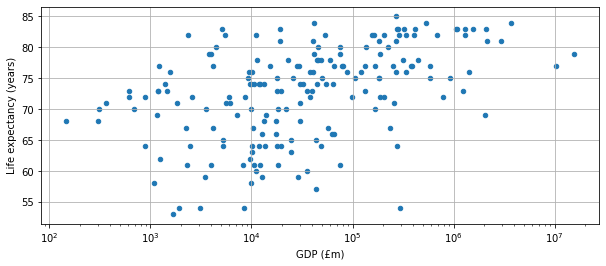

In [9]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is no clear correlation: there are rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (104) million pounds GDP have almost the full range of values, from below 50 to over 80 years. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand million pounds of GDP (3rd tick mark to the right of 104), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years.

Comparing the 10 poorest countries and the 10 countries with the lowest life expectancy shows that total GDP is a rather crude measure. The population size should be taken into account for a more precise definiton of what 'poor' and 'rich' means. Furthermore, looking at the countries below, droughts and internal conflicts may also play a role in life expectancy.

In [10]:
# the 10 countries with lowest GDP
gdpVsLife.sort_values(GDP).head(10)

,country,GDP (£m),Life expectancy (years)
89,Kiribati,147,68
113,"Micronesia, Fed. Sts.",301,68
144,Sao Tome and Principe,309,70
168,Tonga,367,71
158,St. Vincent and the Grenadines,608,72
143,Samoa,615,73
180,Vanuatu,685,70
66,Grenada,876,72
37,Comoros,883,64
70,Guinea-Bissau,1093,58


In [11]:
# the 10 countries with lowest life expectancy
gdpVsLife.sort_values(LIFE).head(10)

,country,GDP (£m),Life expectancy (years)
32,Central African Republic,1664,53
97,Lesotho,1930,54
126,Nigeria,297565,54
149,Sierra Leone,3060,54
33,Chad,8420,54
41,Cote d'Ivoire,43461,57
70,Guinea-Bissau,1093,58
52,Equatorial Guinea,9948,58
54,Eswatini,3495,59
108,Mali,12789,59


Conclusions
To sum up, there is no strong correlation between a country's wealth and the life expectancy of its inhabitants: there is often a wide variation of life expectancy for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.

Using the NY.GDP.PCAP.PP.CD indicator, GDP per capita in current 'international dollars', would make for a better like-for-like comparison between countries, because it would take population and purchasing power into account. Using more specific data, like expediture on health, could also lead to a better analysis.

# Activity
# Extend the project
Make a copy of the Project Notebook: GDP and Life expectancy and change it to answer one or more of the following questions:

To what extent do the ten countries with the highest GDP coincide with the ten countries with the longest life expectancy?

Which are the two countries in the right half of the plot (higher GDP) with life expectancy below 60 years?

What factors could explain their lower life expectancy compared to countries with similar GDP? Hint: use the filtering techniques you learned in Week 2 to find the two countries.



# Answers to Project's Activity




In [12]:
# the 10 countries with highest GDP
gdpVsLife.sort_values(GDP).tail(10)

,country,GDP (£m),Life expectancy (years)
90,"Korea, Rep.",1292215,83
23,Brazil,1412555,76
83,Italy,1566930,83
77,India,2032640,69
59,France,2088596,83
176,United Kingdom,2143143,81
63,Germany,2969559,81
85,Japan,3712021,84
35,China,10409642,77
177,United States,15418178,79


In [13]:
# the 10 countries with highest life expectancy
gdpVsLife.sort_values(LIFE).tail(10)

,country,GDP (£m),Life expectancy (years)
90,"Korea, Rep.",1292215,83
161,Sweden,416133,83
76,Iceland,19282,83
82,Israel,277635,83
83,Italy,1566930,83
100,Liechtenstein,5152,83
103,"Macao SAR, China",41268,84
162,Switzerland,528274,84
85,Japan,3712021,84
74,"Hong Kong SAR, China",270974,85


In [16]:
sortedGDP = gdpVsLife.sort_values(GDP, ascending = False)[GDP].tolist()
midGDP = sortedGDP[round(len(sortedGDP)/2)]
midGDP

30183

In [17]:
indexlist = gdpVsLife.index.values.tolist()
for i in indexlist:
    if gdpVsLife[GDP].tolist()[indexlist.index(i)] >= midGDP and gdpVsLife[LIFE].tolist()[indexlist.index(i)] < 60: 
        print(gdpVsLife[COUNTRY].tolist()[indexlist.index(i)])
        print(gdpVsLife[LIFE].tolist()[indexlist.index(i)])
        print(gdpVsLife[GDP].tolist()[indexlist.index(i)])

Cote d'Ivoire
57
43461
Nigeria
54
297565


# Factors that could explain their lower life expectancy compared to countries with similar GDP

Life expectancy ranges from 57 years in Cote d'Ivoire and 54 years in Nigeria to 83 years in Korea – a staggering gap of 26 and 29 years respectively. These extreme health inequities partly reflect wealth inequities between countries. Generally, wealthier countries have a higher average life expectancy than poorer countries, which can be argued to be achieved through higher standards of living, more effective health systems, and more resources invested in determinants of health (e.g. sanitation, housing, education)